In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("bank_marketing.csv")

In [3]:
df.shape

(45211, 14)

In [4]:
df1= df.head(5000)

In [5]:
df1.shape

(5000, 14)

In [6]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'y'],
      dtype='object')

In [7]:
df1["y"].value_counts()
#  0 -> non valuable
#  1 -> valuable

0    4849
1     151
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

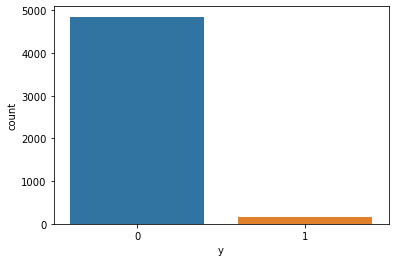

In [8]:
# visualize the target variable
sns.countplot(x= "y", data=df1)
#g= sns.countplot(x= "y", data=df)
#g.set_xticklabels(['Not Fraud','Fraud'])

You can clearly see that there is a huge difference between the data set. 39922 non- valuable and 492 valuable. This is the "data imbalance" problem.

In [9]:
# Checking the NULL values 
df1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
y            0
dtype: int64

# Building the Support Vector Machine Model

Creating Training Data and Test Data

Next, it's time to split our titatnic_data into "training data" and "test data". As before, we will use built-in functionality from "scikit-learn" to do this.

First, we need to divide our data into x values (the data we will be using to make predictions) and y values (the data we are attempting to predict). The following code handles this:

In [10]:
y_data = df1['y']

x_data = df1.drop('y', axis = 1)

Next, we need to import the "train_test_split" function from scikit-learn. The following code executes this import:

In [11]:
from sklearn.model_selection import train_test_split

Lastly, we can use the train_test_split function combined with list unpacking to generate our training data and test data:

In [12]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3,random_state=0)

In [13]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_training_data, y_training_data)

#Predict the response for test dataset
predictions = clf.predict(x_test_data)

Measuring the Performance of a SVM Machine Learning Model

"scikit-learn" has an excellent built-in module called "classification_report" that makes it easy to measure the performance of a classification machine learning model. We will use this module to measure the performance of the model that we just created.

First, let's import the module:

In [14]:
from sklearn.metrics import classification_report

Next, let's use the module to calculate the performance metrics for our SVM machine learning module:

In [15]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1455
           1       0.35      0.18      0.24        45

    accuracy                           0.97      1500
   macro avg       0.66      0.58      0.61      1500
weighted avg       0.96      0.97      0.96      1500



If you're interested in seeing the raw confusion matrix and calculating the performance metrics manually, you can do this with the following code:

In [16]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_data, predictions))

[[1440   15]
 [  37    8]]


If you see the "recall" of "majority class instances-1" in the classification report-
The main issue over here we have a very poor recall rate for the majority class when the original imbalanced data is used for training the model.Wchic is 0.18 for 1- category

The cases in which the dataset did not has "potential or valuable" customer and our model also predicted as not having it is called the "True Negatives". For our matrix, True Negative = 1440


The cases in which the dataset has "potential or valuable" customer and our model also predicted as having it are called the "True Positives". For our matrix, True Positives = 8


However, there are are some cases where the dataset has not any "potential or valuable" customer, but our model has predicted that they do. This kind of error is the Type I Error and we call the values as "False Positives". For our matrix, False Positives = 15


Similarly, there are are some cases where the dataset has "potential or valuable" customer, but our model has predicted that it doesn’t. This kind of error is the Type II Error and we call the values as "False Negatives".  For our matrix, False Negatives = 37



What is Recall?
The recall is the measure of our model correctly identifying "True Positives". Thus, for all the instances who actually are "potential or valuable" customer, recall tells us how many we correctly identified as "potential or valuable" customer. Mathematically:
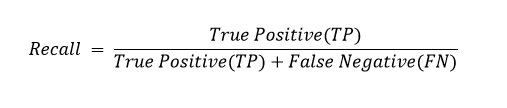

# Solving Imbalance Problem using SMOTE Techniques 

In [18]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x_training_data, y_training_data)

In [20]:
#Train the model using the training sets
clf.fit(X_res, y_res)

#Predict the response for test dataset
predictions = clf.predict(x_test_data)

In [21]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1455
           1       0.25      0.93      0.40        45

    accuracy                           0.92      1500
   macro avg       0.63      0.92      0.68      1500
weighted avg       0.98      0.92      0.94      1500



We can see directly, the recall has improved from .18 to .93. Such is the power and beauty of the three lines code.

SMOTE works by selecting pair of minority class observations and then creating a synthetic point that lies on the line connecting these two. It is pretty liberal about selecting the minority points and may end up picking up minority points that are outliers.